# Without sWeights: `common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25u{1,2};{i}`

# Fit the complete data
WITH A LOOP IMPLEMENTED
This file is fitting for different cuts on the BDT variable

In the `fit_common_uncertainties.ipynb`, the fixed parameters of the (1) $D^*\pi\pi\pi$ and (2) $D^*K\pi\pi$  distributions have been changed within their uncertainty intervals, according to a gaussian. $n_sig$ have been computed for each of this variation.

The goal of this documend is to plot and fit the two $n_{sig}$ distributions.

- **Mode 1**: $n_{sig}$ distribution by varying the tail parameters of $D^*\pi\pi\pi$
- **Mode 2**: $n_{sig}$ distribution by varying all the parameters of $D^*K\pi\pi$ 

## Import

In [1]:
from uncertainties import unumpy as unp
from uncertainties import ufloat

from math import sqrt
import numpy as np

from bd2dst3pi.locations import loc

import sys
sys.path.append(loc.SCRIPTS)

from load_save_data import retrieve_params, format_previous_params
import plot.histogram as h
from plot.tool import save_file

Welcome to JupyROOT 6.22/02


In [2]:
name_params_KPiPi = {
    'alphaL_Kpipi'           : '$\\alpha_{L, D^* K\\pi\\pi}$',
    'alphaR_Kpipi'           : '$\\alpha_{R, D^* K\\pi\\pi}$',
    'nL_Kpipi'               : '$n_{L, D^* K\\pi\\pi}$',
    'nR_Kpipi'               : '$n_{R, D^* K\\pi\\pi}$',
    'fraction_Kpipi'         : '$f_{\\frac{L}{R},D^* K\\pi\\pi}$',
    'muL_Kpipi'              : '$\\mu_{L, D^* K\\pi\\pi}$',
    'sigmaL_Kpipi'           : '$\\sigma_{L, D^* K\\pi\\pi}$',
    'muR_Kpipi'              : '$\\mu_{R, D^* K\\pi\\pi}$',
    'sigmaR_Kpipi'           : '$\\sigma_{R, D^* K\\pi\\pi}$',
}

name_params = {
    # Signal
    'mu'      : '$\\mu_S$',
    'sigmaL'  : '$\\sigma_{L,S}$',
    'sigmaR'  : '$\\sigma_{R,S}$',    
    'alphaL'  : '$\\alpha_{L,S}$',
    'alphaR'  : '$\\alpha_{R,S}$',
    'nL'      : '$n_{L,S}$',
    'nR'      : '$n_{R,S}$',
    'fraction': '$f_{\\frac{L}{R},S}$',
    'n_sig'   : '$n_{B^0 \\to D^* 3\\pi}$',
    'frac': '$f_{\\frac{L}{R},S}$',
    'r_bkgK'  : '$\\frac{n_{B^0 \\to D^*K\\pi\\pi}}{n_{B^0 \\to D^* 3\\pi}}$',
}

In [3]:
name_params_dic = {}
name_params_dic['1'] = name_params
name_params_dic['2'] = name_params_KPiPi
name_params_dic['2']['r_bkgK'] = name_params_dic['1']['r_bkgK']

In [4]:
name_data_common = 'common_Dst_constr_B0toDstDsWithmu2Free'
BDT = -1.25

name_data_MC = 'MC_constr_opposedCB_sharedMean'
name_data_KPiPi = "data_KPiPi_constr"

name_data = f'{name_data_common}_BDT{BDT}'

In [5]:
starts = {}
ends = {}
# Mode 1
starts['1'] = 0
ends['1'] = 1165

# Mode 2
starts['2'] = 0
ends['2'] = 1120

In [6]:
n_sig_opt = retrieve_params(f"{name_data}", name_folder=name_data_common)[f'n_sig|BDT{BDT}']
n_sig_opt_err = retrieve_params(f"{name_data}", name_folder=name_data_common)[f'n_sig|BDT{BDT}_err']
print('optimal n_sig =', n_sig_opt)

optimal n_sig = 51394.02436424166


In [7]:
saved_params = {}

# Fixed nR
MC_params = retrieve_params(name_data_MC, name_folder='MC')
saved_params['MC'] = {}
for key, value in MC_params.items():
    if not key.endswith('_err'):
        saved_params['MC'][key[:-3]] = value

# B0->DstKPiPi
Kpipi_params = format_previous_params(retrieve_params(name_data_KPiPi, name_folder='data_KPiPi')) # already in MeV 
saved_params['Kpipi'] = {}
for key, value in Kpipi_params.items():
    if not key.endswith('_err'):
        saved_params['Kpipi'][key + '_Kpipi'] = value

# common with BDT cut (for startning values of the fit)
saved_params['pipipi'] = format_previous_params(retrieve_params(name_data_common, name_folder=name_data_common))

params_mode = {}
params_mode['1'] = {'alphaR': 'pipipi', 'nR':'MC', 'alphaL': 'pipipi', 'nL':'pipipi'}
params_mode['2'] = {'r_bkgK': 'pipipi'}
for key in saved_params['Kpipi'].keys():
        params_mode['2'][key] = 'Kpipi'


all_params = list(params_mode['1'].keys()) + list(params_mode['2'].keys())
result_fit = {}
result_fit['1'] = retrieve_params(f"{name_data}u1;18", name_folder=name_data)
result_fit['2'] = retrieve_params(f"{name_data}u2;18", name_folder=name_data)
for m in '1', '2':
    r_params = result_fit[m]['r_params']
    for param in r_params.keys():
        assert param in all_params, print(list(r_params.keys()), all_params)

def test_mode(r_params, mode):
    file_ok = True
    for amode in params_mode.keys():
        
        if amode==mode:
            for param, file in params_mode[amode].items():
                if saved_params[file][param]==r_params[param]:
                    print(f'Error in param {param} ; should change')
                    file_ok = False
        else:
            for param, file in params_mode[amode].items():
                if param not in saved_params[file]:
                    print(f'{param} not in saved_params[file]')
                    print(saved_params[file])
                elif param not in r_params:
                    print(f'{param} not in r_params')
                    print(r_params)
                if saved_params[file][param]!=r_params[param]:
                    print(f'Error in param {param} ; should not change')
                    file_ok = False
    return file_ok

In [13]:
n_sig_u = {}
n_sig_u['1'] = []
n_sig_u['2'] = []

n_sig = {}
n_sig['1'] = []
n_sig['2'] = []

parameters = {'1' : {}, '2': {}}
for m in '1', '2':
    for param in params_mode[m]:
            parameters[m][param] = []


fit_not_ok = {}
fit_not_ok['1'] = []
fit_not_ok['2'] = []

for m in '1', '2':
    print(f'load mode {m}')
    for i in range(starts[m], ends[m]):
        result_fit = retrieve_params(f"{name_data}u{m};{i}", name_folder=name_data)
        if result_fit['fit_ok'] and 'True' not in result_fit['info_params']:
            n_sig_u[m].append(ufloat(result_fit[f'n_sig;{i}'], result_fit[f'n_sig;{i}_err']))
            n_sig[m].append(result_fit[f'n_sig;{i}'])
        else:
            print(f'Fit number {i} not ok')
            if 'True' in result_fit['info_params']:
                print("(params at lim)")
                print(result_fit['info_params'])
            fit_not_ok[m].append(i)
        
        if 'r_params' in result_fit:
            test_ok = test_mode(result_fit['r_params'], m)
            if not test_ok:
                print(f'error in {i}')
        else:
            print(f'r_params not in {i}')
            
        for param in params_mode[m]:
            parameters[m][param].append(result_fit['r_params'][param])
        
n_sig['1'] = np.array(n_sig['1'])
n_sig['2'] = np.array(n_sig['2'])

load mode 1
Fit number 200 not ok
Fit number 211 not ok
Fit number 419 not ok
Fit number 674 not ok
Fit number 708 not ok
Fit number 751 not ok
Fit number 838 not ok
Fit number 951 not ok
Fit number 1015 not ok
load mode 2
Fit number 56 not ok
Fit number 110 not ok
Fit number 182 not ok
Fit number 220 not ok
Fit number 307 not ok
Fit number 406 not ok
Fit number 409 not ok
Fit number 604 not ok
Fit number 631 not ok
Fit number 773 not ok
Fit number 786 not ok
Fit number 904 not ok
Fit number 906 not ok
Fit number 1023 not ok
Fit number 1063 not ok
Fit number 1078 not ok
Fit number 1095 not ok


## Histogram

In [14]:
colors = {}
colors['1'] = 'green'
colors['2'] = 'saddlebrown'

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/modes


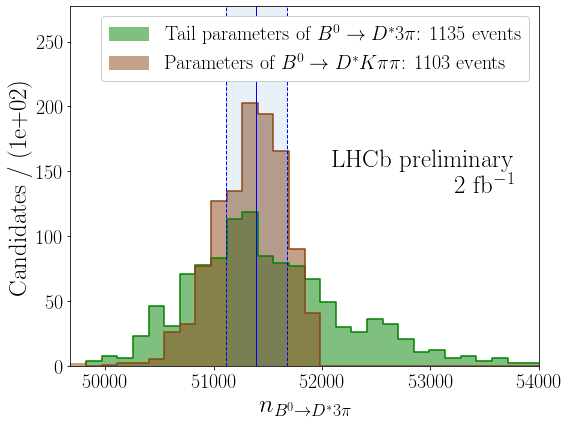

In [14]:
fig, ax = h.plot_hist_var([unp.nominal_values(n_sig['1']), unp.nominal_values(n_sig['2'])], 'signal_yield', '$n_{B^0 \\to D^*3\\pi}$',
               name_datas = ['Tail parameters of $B^0 \\to D^* 3\pi$', 'Parameters of $B^0 \\to D^* K \pi\pi$'],
              name_folder=name_data, n_bins=30, mode_hist=True, density=False, colors=list(colors.values()),
                         pos_text_LHC=[0.95, 0.6, 'right'], high=54000, save_fig=False, alpha=0.9)
ax.axvline(x=n_sig_opt, color='blue', linewidth=1.)
ax.axvspan(n_sig_opt-n_sig_opt_err, n_sig_opt+n_sig_opt_err, alpha=0.1)
ax.axvline(x=n_sig_opt-n_sig_opt_err, color='blue', linewidth=1., linestyle='--')
ax.axvline(x=n_sig_opt+n_sig_opt_err, color='blue', linewidth=1., linestyle='--')
ax.legend(fontsize=20, framealpha=1)

save_file(fig, f'modes', name_folder=name_data)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/parameters/alphaR_mode1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/parameters/nR_mode1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/parameters/alphaL_mode1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/parameters/nL_mode1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/parameters/r_bkgK_mode2
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/parameters/alphaL_Kpipi_mode2
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/parameters/alphaR_Kpipi_mode2
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/parameters/fraction_Kpipi_mo

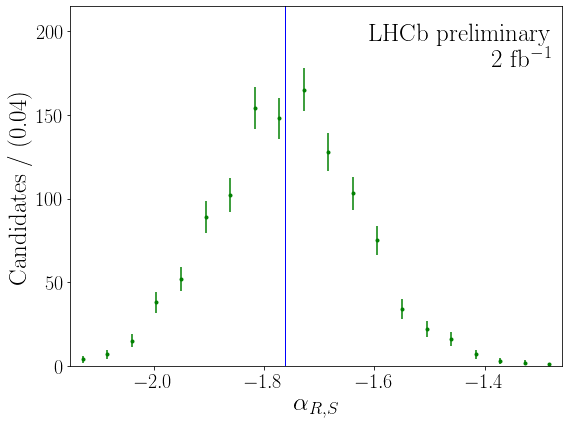

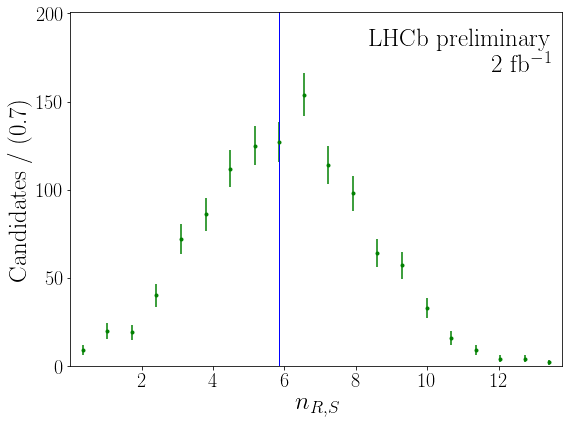

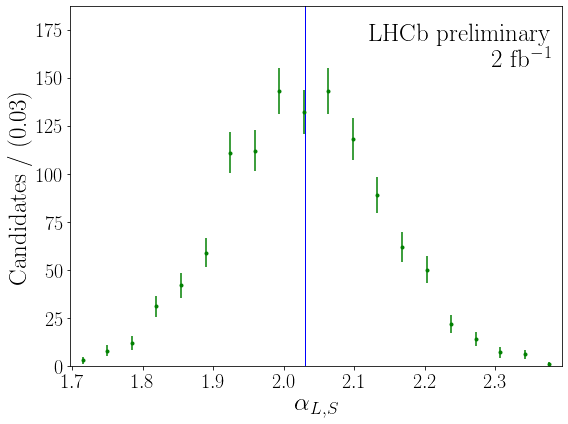

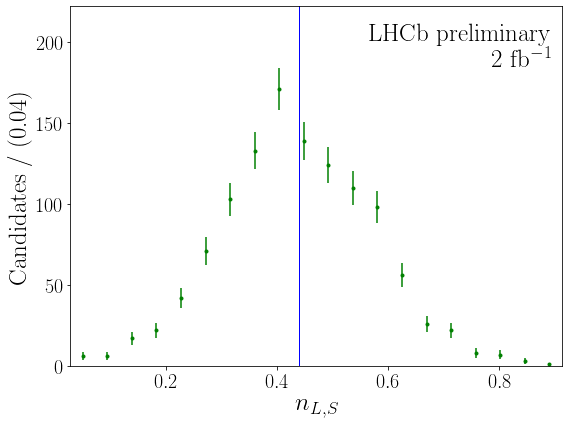

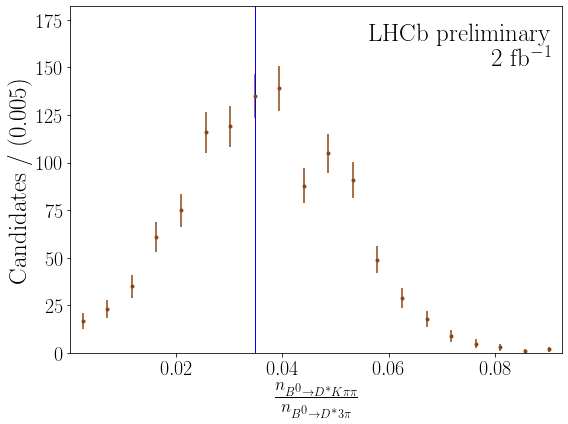

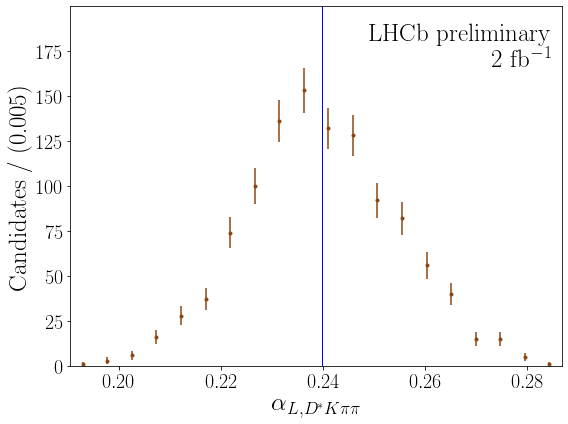

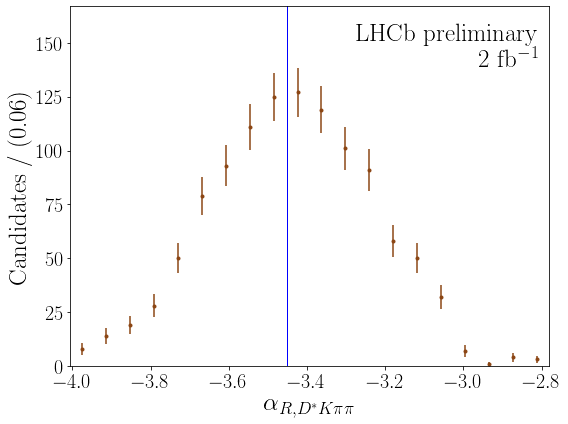

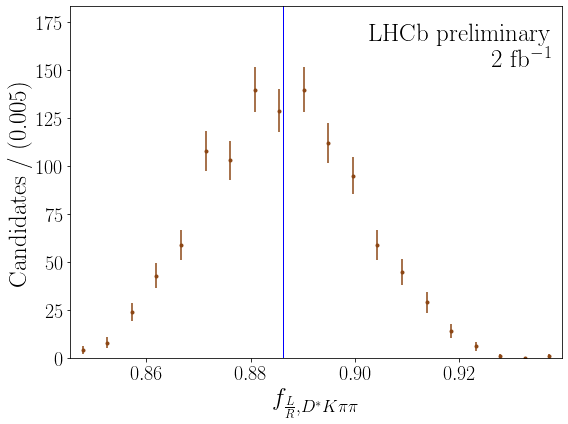

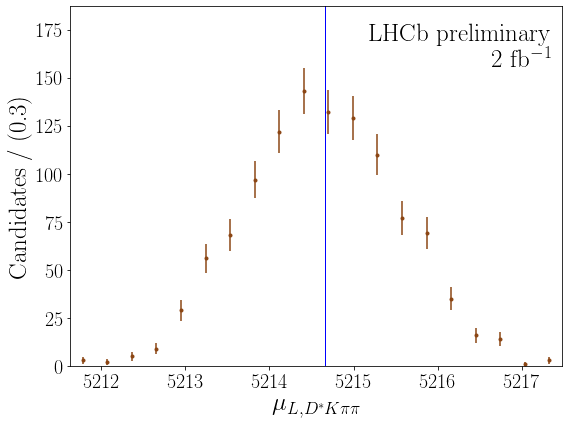

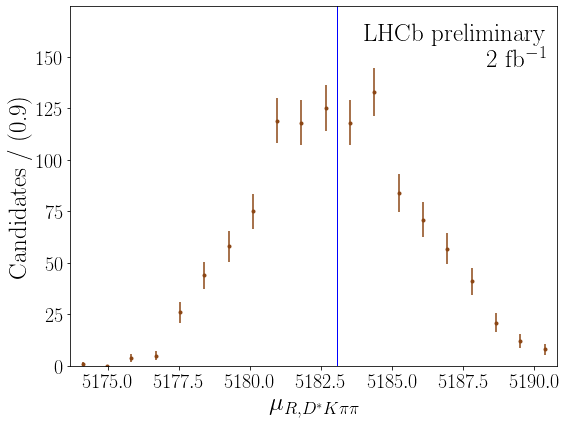

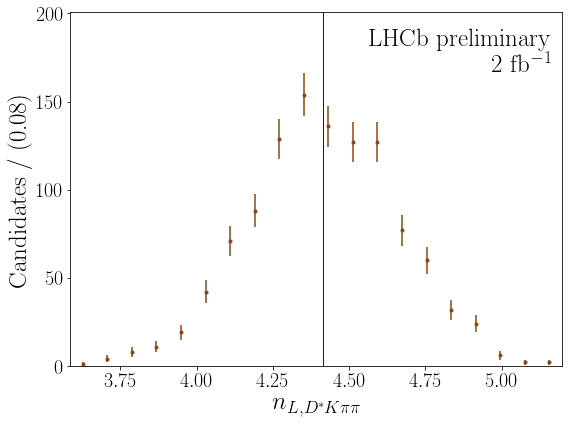

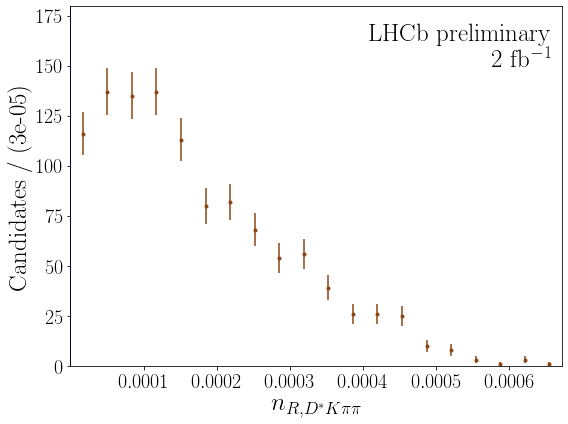

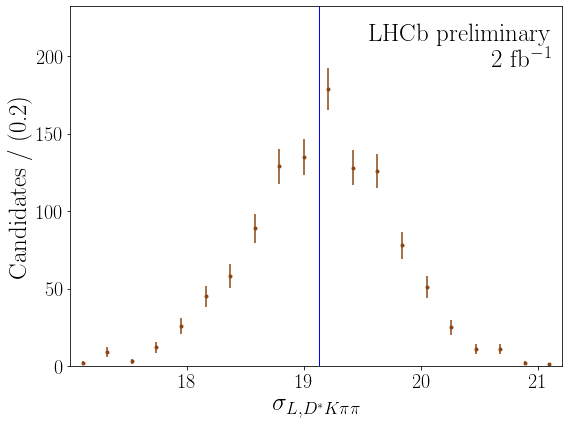

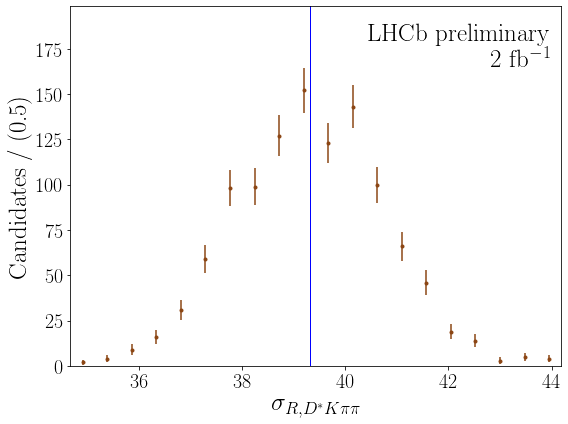

In [32]:
for m in '1', '2':
    for name_param, data_param in parameters[m].items():
        fig, ax = h.plot_hist_var(data_param, name_param, name_variable = name_params_dic[m][name_param],
               name_datas = f'mode {m}',
              name_folder=f'{name_data}/parameters', n_bins=20, mode_hist=False, colors=colors[m],
                         pos_text_LHC='right', save_fig=False)
        file = params_mode[m][name_param]
        ax.axvline(x=saved_params[file][name_param], color='blue', linewidth=1.)
        save_file(fig, name_file =f'{name_param}_mode{m}', name_folder=f'{name_data}/parameters')

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/parameters/nR_Kpipi_mode2


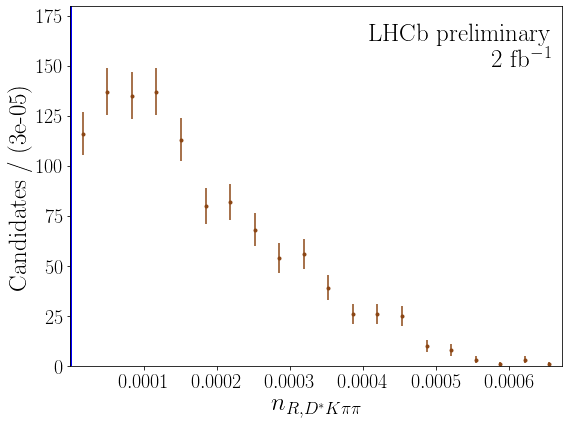

In [20]:
m = '2'
name_param = 'nR_Kpipi'
data_param = parameters[m][name_param]

fig, ax = h.plot_hist_var(data_param, name_param, name_variable = name_params_dic[m][name_param],
       name_datas = f'mode {m}',
      name_folder=f'{name_data}/parameters', n_bins=20, mode_hist=False, colors=colors[m],
                 pos_text_LHC='right', save_fig=False)
file = params_mode[m][name_param]
ax.axvline(x=saved_params[file][name_param], color='blue', linewidth=3.)
save_file(fig, name_file =f'{name_param}_mode{m}', name_folder=f'{name_data}/parameters')

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/S_mode1


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='S', ylabel='Candidates / (4e+02)'>)

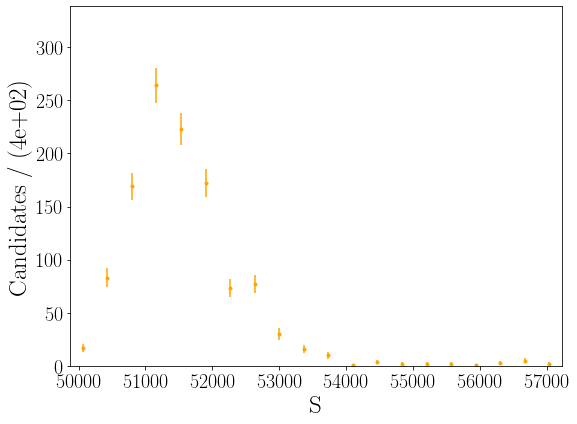

In [9]:
fig, ax = h.plot_hist_var(unp.nominal_values(n_sig['1']), 'S',
               'Tail parameters of $B^0 \\to D^* 3\pi$',
                name_datas='mode1',
                n_bins=20,
              name_folder=name_data, colors=colors['1'])
ax.axvline(x=n_sig_opt, color='red', linewidth=1.)
save_file(fig, f'n_sig_mode1', name_folder=name_data)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/mode2_None


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='mode2', ylabel='Candidates / (1e+02)'>)

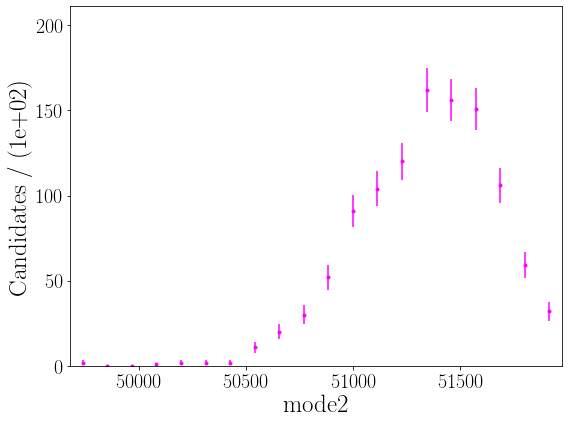

In [10]:
h.plot_hist_var(unp.nominal_values(n_sig['2']),'mode2', 
               'Parameters of $B^0 \\to D^* K 2\pi$', n_bins=20,
              colors=colors['2'],
              name_folder=name_data)

In [11]:
print(min(n_sig['1']), max(n_sig['1']))
print(min(n_sig['2']), max(n_sig['2']))

49879.746448486374 57216.40753944943
49679.069563413745 51972.42475422437


## COMPUTATION WITH A FIT

In [ ]:
import zfit
import timeit
from plot.fit import plot_hist_fit_var
from fit import launch_fit, define_zparams, save_params, sum_crystalball
from variables import name_params, name_params_KPiPi

In [12]:
low = {}
high = {}

low['1'] = 49800
high['1'] = 53500

low['2'] = 50500
high['2'] = 51950


### Initial values

In [13]:
initial_values = {}

initial_values['1'] = {
    # Signal        
    'mu'    :{ 'value': n_sig_opt , 'low': 50000   , 'high': 52000  , 'floating': True},
    'sigma' :{ 'value': 500       , 'low': 300.    , 'high': 700.  , 'floating': True},
    'n'     :{ 'value': 130.        , 'low': 10.   , 'high': 200.  , 'floating': True},
    'alpha' :{ 'value': -1.       , 'low': -1.3    , 'high': -0.08  , 'floating': True}
}
initial_values['2'] = {
    # Signal        
    'mu'      :{ 'value': n_sig_opt , 'low': 50000 , 'high': 52000  , 'floating': True},
    'sigma'   :{ 'value': 200 , 'low': 30.         , 'high': 1000.  , 'floating': True}
}

### Observables and parameters

In [14]:
obs = {}
zparams = {}

In [15]:
obs['1'] = zfit.Space("x", limits=(low['1'], high['1']))
obs['2'] = zfit.Space("x", limits=(low['2'], high['2']))

In [16]:
zparams['1'] = define_zparams(initial_values['1'], num='1')
zparams['2'] = define_zparams(initial_values['2'], num='2')

### PDFs

In [17]:
model = {}
data = {}

# model['1'] = zfit.pdf.Gauss(zparams['1']['mu'],zparams['1']['sigma'],obs=obs['1'])
model['1'] = zfit.pdf.CrystalBall(zparams['1']['mu'], zparams['1']['sigma'], zparams['1']['alpha'], zparams['1']['n'], obs=obs['1'])
model['2'] = zfit.pdf.Gauss(zparams['2']['mu'],zparams['2']['sigma'],obs=obs['2'])

data['1'] = zfit.Data.from_numpy(array=n_sig['1'], obs=obs['1'])
data['2'] = zfit.Data.from_numpy(array=n_sig['2'], obs=obs['2'])

In [18]:
results = {}
params = {}

In [19]:
start = timeit.default_timer()
launch_fit(model['1'], data['1'])
launch_fit(model['1'], data['1'])
launch_fit(model['1'], data['1'])
r = launch_fit(model['1'], data['1'])
results['1'] = r[0]
params['1'] = r[1]
stop = timeit.default_timer()

------------------------------------------------------------------
| FCN = 8879                    |     Ncalls=244 (255 total)     |
| EDM = 1.78e+05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
name       value    minuit_hesse    at limit
-------  -------  --------------  ----------
alpha;1  -0.7638     +/-   0.072       False
mu;1       51300     +/-      33       False
n;1        131.7

Info in negative or zero diagonal element in covariance matrix : i = 2
Info in added to diagonal of Error matrix a value : dg = 5.60061
Info: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in Current  Edm is : edm = 0.00223867
Info in Required Edm is : edmval = 0.001
Info: VariableMetricBuilder: no improvement in line search
Info: VariableMetricBuilder: iterations finish without convergence.
Info in VariableMetricBuilder : edm = 2.36709e+07
Info in             requested : edmval = 0.001
Info: VariableMetricBuilder: FunctionMinimum is invalid after second try
Info: VariableMetricBuilder: no improvement in line search
Info: VariableMetricBuilder: iterations finish without convergence.
Info in VariableMetricBuilder : edm = 569.709
Info in             requested : edmval = 0.001
Info: VariableMetricBuilder: Edm has been re-computed after Hesse
Info in new value is now smaller than the required tolerance, : edm = 0.000900116
Info: VariableMetricBuilder: no

In [20]:
start = timeit.default_timer()
launch_fit(model['2'], data['2'])
launch_fit(model['2'], data['2'])
launch_fit(model['2'], data['2'])
r = launch_fit(model['2'], data['2'])
results['2'] = r[0]
params['2'] = r[1]
stop = timeit.default_timer()

------------------------------------------------------------------
| FCN = 7692                    |      Ncalls=51 (51 total)      |
| EDM = 3.65e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name       value    minuit_hesse    at limit
-------  -------  --------------  ----------
mu;2       51370     +/-      12       False
sigma;2    331.6     +/-      10       False
----------------

Info: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in Current  Edm is : edm = 0.00101855
Info in Required Edm is : edmval = 0.001
Info: VariableMetricBuilder: no improvement in line search


In [21]:
name_params = {
    'mu'    : '$\\mu$',
    'sigma' : '$\\sigma$',
    'alpha' : '$\\alpha$',
    'n'     : '$n$'
}

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:511: UserWarning: The function <function Space.limits at 0x7f8c3bb3f7a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[49800.]]), array([[53500.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:34: UserWarning: The function <function Space.area at 0x7f8c3bb43b90> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[49800.]]), array([[53500.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


Number of d.o.f. in the model:  4
Reduced chi2:  1.9621291142721045
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/mode1_fit_details
Number of d.o.f. in the model:  2
Reduced chi2:  1.4914198575552264
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/mode2_fit_details


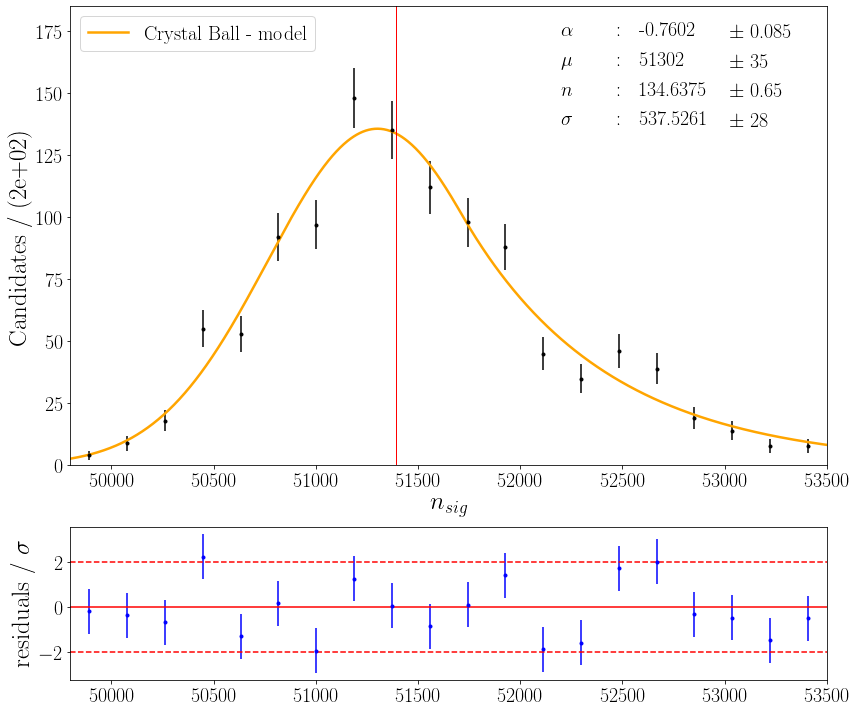

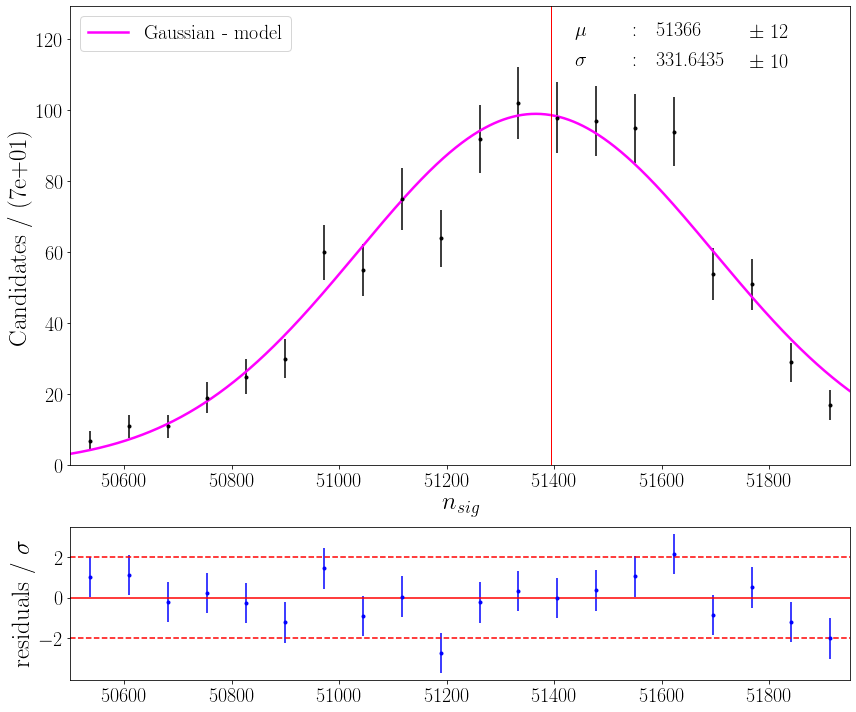

In [23]:
for m in '1', '2':
    fig, ax, _ = plot_hist_fit_var(n_sig[m], 'n_sig', '$n_{sig}$', name_data=f'mode{m}', name_folder=name_data, 
                      models=model[m], colors=colors[m], name_models='', n_bins=20, 
                      params=params[m],name_params=name_params, obs=obs[m], mode_hist=False, save_fig=False)
    ax.axvline(x=n_sig_opt, color='red', linewidth=1.)
    save_file(fig, f'mode{m}_fit_details', name_folder=name_data)
    fig

Number of d.o.f. in the model:  4
Reduced chi2:  1.9621291142721045
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/mode1_fit
Number of d.o.f. in the model:  2
Reduced chi2:  1.4914198575552264
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/mode2_fit


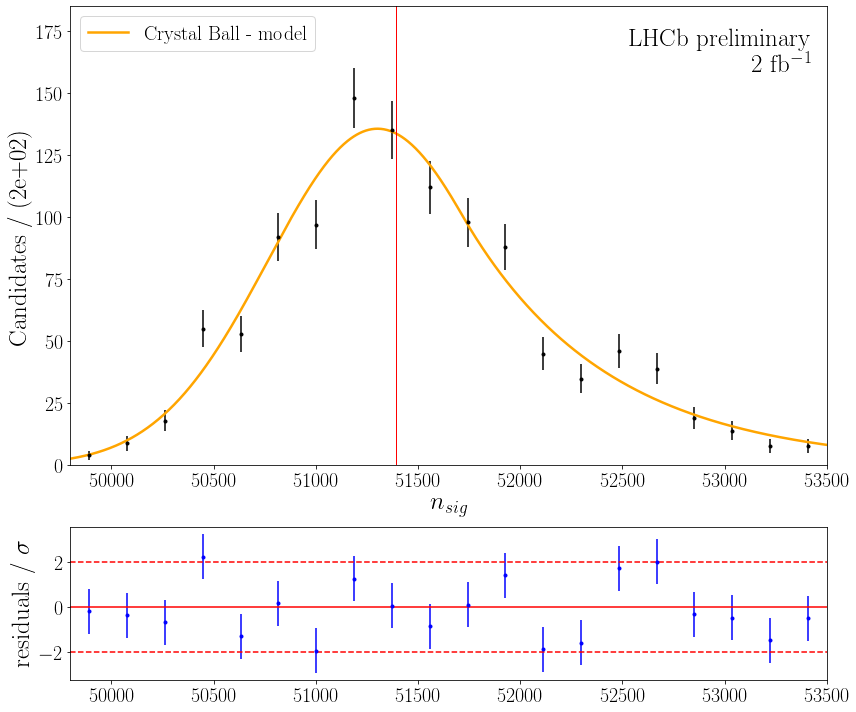

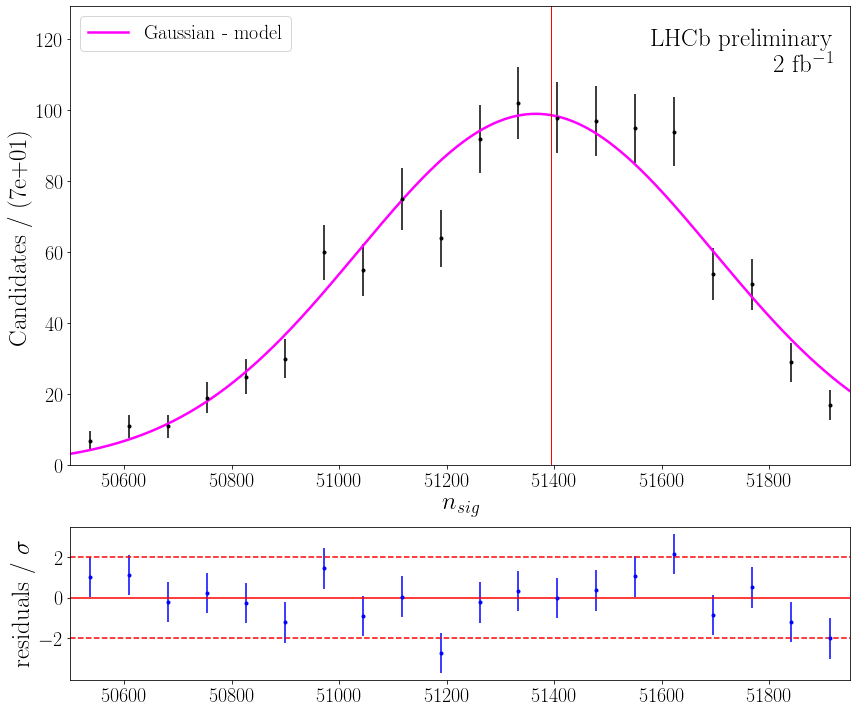

In [25]:
for m in '1', '2':
    fig, ax, _ = plot_hist_fit_var(n_sig[m], 'n_sig', '$n_{sig}$', name_data=f'mode{m}', name_folder=name_data, 
                      models=model[m], colors=colors[m], name_models='', n_bins=20, 
                      obs=obs[m], pos_text_LHC='right', mode_hist=False, save_fig=False)
    ax.axvline(x=n_sig_opt, color='red', linewidth=1.)
    save_file(fig, f'mode{m}_fit', name_folder=name_data)

In [33]:
for m in '1', '2':
    save_params(params[m], name_data+f'_mode{m}', True, name_folder=name_data, remove=f';{m}')

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25_mode1_params.json
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25/common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25_mode2_params.json


In [21]:
params= {}
params['1']  = retrieve_params(f"{name_data}_mode{1}", name_folder=name_data)
params['2']  = retrieve_params(f"{name_data}_mode{2}", name_folder=name_data)

sigma1 = ufloat(params['1']['sigma'], params['1']['sigma_err'])
sigma2 = ufloat(params['2']['sigma'], params['2']['sigma_err'])
sigma = unp.sqrt(sigma1*sigma1+sigma2*sigma2)

In [9]:
print(sigma)

632+/-24


## COMPUTATION WITH `np.std`

In [11]:
n_std = {}
n_std['1'] = np.std(n_sig['1'])
n_std['2'] = np.std(n_sig['2'])
print(n_std['1'])
print(n_std['2'])

920.5709502510185
319.66718023350285


In [12]:
sigma_np = sqrt(n_std['1']**2+n_std['2']**2)

In [13]:
print(sigma_np)

974.4937047331306


In [15]:
sigma_np/n_sig_opt

0.018961225877675236

In [17]:
n_sig_opt

51394.02436424166

In [18]:
n_sig_opt_err

281.2722381592608

In [22]:
sigma_tot = sqrt(sigma_np**2+n_sig_opt_err**2)

In [23]:
sigma_tot

1014.2741505744992